In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
%matplotlib inline
plt.style.use(['ggplot'])

In [70]:
# importing the data
data = pd.read_csv("FoDS-A1.csv", names = ["X1","X2","Y"], header=0)

# Data Preprocessing

Preprocessing the data involves:

- `Normalizing` the data:<br>
<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; <font size="4"> X = $\frac{ X_{} - X_{min} }{X_{max} - X_{min}}$ </font>
<br>
<br>                 
- `Shuffling` the data
<br>
<br>
- `Splitting` the data to test and train 

In [71]:
def normalize(data):
    data_min = data.min()
    data_max = data.max()
    data["X1"] = (data["X1"] - data_min[0])/(data_max[0]-data_min[0])
    data["X2"] = (data["X2"] - data_min[1])/(data_max[1]-data_min[1])
    data["Y"] = (data["Y"] - data_min[2])/(data_max[2]-data_min[2])

In [72]:
def split(data,fraction = 0.7):
    
    shuffled_data = data.sample(frac=1, random_state=0) # Shuffling the dataset
    split_index = int(fraction * len(data)) # Finding split index
    
    # Spliting the dataset 
    train= shuffled_data[:split_index]
    test = shuffled_data[split_index:]
    return train.reset_index(drop=True), test.reset_index(drop=True)

In [73]:
def generate_vectors(train_X, degree):
    total_terms = int(((degree+1)*(degree+2))/2)
    terms = np.zeros((total_terms,train_X.shape[0]))
    
    
    for i in range(train_X.shape[0]):

        current_x1 = train_X[i][0]
        current_x2 = train_X[i][1]
        m = 0
        part_x1 = 1
        part_x2 = 1
        
        for j in range(degree+1):
            for k in range(degree-j+1):
                terms[m][i] = part_x1 * part_x2
                m += 1
                part_x1 = part_x1 * current_x1 
            
            part_x2 = part_x2 * current_x2
            part_x1 = 1
            
    W = np.zeros(total_terms)
                
    return terms.T, W

In [74]:
def calculate_cost(W, X, Y):
    m = len(Y)
    predictions = X.dot(W)
    cost = np.sum(np.square(predictions - Y)) * (1/(2*m))
    return cost

In [75]:
def gradient_descent(X, Y, W, learning_rate=0.01, iterations=1000):

    cost_history = np.zeros(iterations)
    m = len(Y)
    for it in range(iterations):
        
        prediction = np.dot(X, W)        
        W = W - np.multiply((X.T.dot((prediction - Y))), learning_rate/m)
        cost_history[it]  = calculate_cost(W, X, Y)
        
    return W, cost_history

In [76]:
def stochastic_gradient_descent(X,Y,W,learning_rate=0.01,iterations=10):

    m = len(Y)
    m = int(m / 10)
    cost_history = np.zeros(iterations)
       
    for it in range(iterations):
        cost =0.0
        for i in range(m):
            rand_int = np.random.randint(0,m)
            X_i = X[rand_int:rand_int+1]
            Y_i = Y[rand_int:rand_int+1]
            prediction = np.dot(X_i,W)
            W = W - (learning_rate/m) * (X_i.T.dot((prediction - Y_i)))
            cost += calculate_cost(W,X_i,Y_i)
        cost_history[it]  = cost
        
    return W, cost_history

In [77]:
def errorloop(cost_history):
    for it in range(len(cost_history)):
        if it%500==0: print(cost_history[it])

In [78]:
def RMSerror(final_error):
    return math.sqrt(2*final_error)

In [79]:
def model(X, Y, learning_rate, iterations, degree):
    train_X_terms, W_gd = generate_vectors(X, degree)
    W_gd, cost_history_gd = gradient_descent(train_X_terms, Y, W_gd, learning_rate, iterations)
    
    print(W_gd)
    print('Final cost/MSE:  {:0.3f}'.format(cost_history_gd[-1]))
    print('-------------------------------------------------------------------')
    errorloop(cost_history_gd)

    train_X_terms, W_sgd = generate_vectors(X, degree)
    W_sgd, cost_history_sgd = stochastic_gradient_descent(train_X_terms, Y, W_sgd, learning_rate, iterations)

    print(W_sgd)
    print('Final cost/MSE:  {:0.3f}'.format(cost_history_sgd[-1]))
    print('-------------------------------------------------------------------')
    errorloop(cost_history_sgd)
    
    return train_X_terms, W_gd, cost_history_gd, W_sgd, cost_history_sgd, iterations, degree

In [80]:
def cost_plotter(n_iter, cost_history_gd, cost_history_sgd, degree):
    figure, axis = plt.subplots(1,2, figsize=(15,8))
    figure.suptitle("Model degree = "+str(degree),  fontsize="x-large", fontweight ="bold")

    axis[0].scatter(range(n_iter),cost_history_gd)
    axis[0].set_title("Gradient Descent")
    axis[0].set_xlabel("Iterations")
    axis[0].set_ylabel("J(theta)")


    axis[1].scatter(range(n_iter),cost_history_sgd)
    axis[1].set_title("Stochastic_Gradient Descent")
    axis[1].set_xlabel("Iterations")
    axis[1].set_ylabel("J(theta)")

    plt.show()

In [81]:
normalize(data)
train_data, test_data = split(data)

In [82]:
X1 = np.array(train_data['X1'])
X2 = np.array(train_data['X2'])
Y = np.array(train_data['Y'])
X11 = np.array(test_data['X1'])
X21 = np.array(test_data['X2'])
Y1 = np.array(test_data['Y'])

In [83]:
#model degree = 0
l = np.c_[X1, X2]
train_X_terms, W_gd, cost_history_gd, W_sgd, cost_history_sgd, n_iter, degree = model(l, Y, 0.01, 20000, 0)

[0.49471861]
Final cost/MSE:  0.059
-------------------------------------------------------------------
0.17919247787560205
0.059259629627352726
0.05925445197668834
0.0592544517531627
0.059254451753153047
0.05925445175315306
0.05925445175315306
0.059254451753153047
0.059254451753153047
0.059254451753153047
0.059254451753153047
0.059254451753153047
0.059254451753153047
0.059254451753153047
0.059254451753153047
0.059254451753153047
0.059254451753153047
0.059254451753153047
0.059254451753153047
0.059254451753153047
0.059254451753153047
0.059254451753153047
0.059254451753153047
0.059254451753153047
0.059254451753153047
0.059254451753153047
0.059254451753153047
0.059254451753153047
0.059254451753153047
0.059254451753153047
0.059254451753153047
0.059254451753153047
0.059254451753153047
0.059254451753153047
0.059254451753153047
0.059254451753153047
0.059254451753153047
0.059254451753153047
0.059254451753153047
0.059254451753153047
[0.47938598]
Final cost/MSE:  7.138
--------------------------

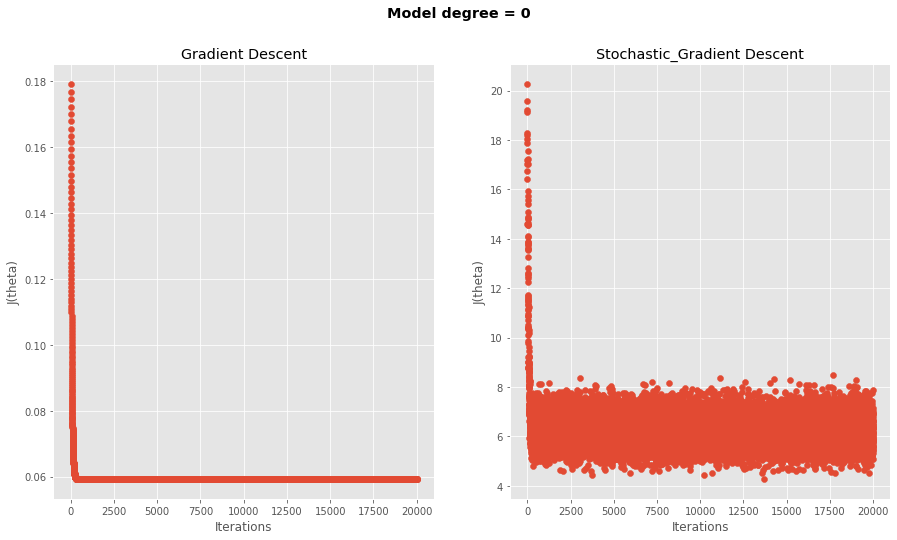

In [84]:
cost_plotter(n_iter, cost_history_gd, cost_history_sgd, degree)

In [85]:
l = np.c_[X11, X21]
train_X_terms, A = generate_vectors(l, degree)
print(calculate_cost(W_gd, train_X_terms, Y1))

train_X_terms, A = generate_vectors(l, degree)
print(calculate_cost(W_sgd, train_X_terms, Y1))

0.056230545404571425
0.05661801529413307


In [86]:
#model degree = 1
l = np.c_[X1, X2]
train_X_terms, W_gd, cost_history_gd, W_sgd, cost_history_sgd, n_iter, degree = model(l, Y, 0.01, 20000, 1)

[ 0.99586634 -2.34060528  1.26976754]
Final cost/MSE:  0.014
-------------------------------------------------------------------
0.17816392638106254
0.05985016784451488
0.05460839414554312
0.050627914340302164
0.04730079344426022
0.04437307793948588
0.041732586346542075
0.03932442579926048
0.03711731383202672
0.035090115756040416
0.033226428879902424
0.0315123725325973
0.029935657777292776
0.02848517026939681
0.027150761005725155
0.025923123236362443
0.024793706839459893
0.02375465053156139
0.0227987238711848
0.021919275640626675
0.021110187048904532
0.020365828953718145
0.019681022615247984
0.01905100363333747
0.018471388787164127
0.017938145534762032
0.017447563955448588
0.016996230938063395
0.016581006434688763
0.016199001614343386
0.01584755876453987
0.015524232800828383
0.015226774255664132
0.014953113628240686
0.014701346986403012
0.014469722720467999
0.014256629356794588
0.014060584346318936
0.013880223750053197
0.013714292749787447
[ 0.99770681 -2.28857001  1.20101898]
Final co

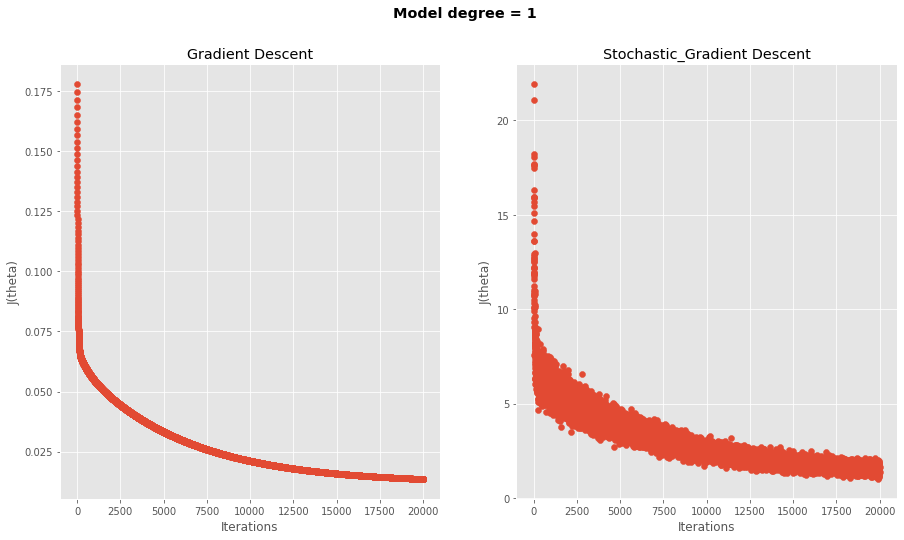

In [87]:
cost_plotter(n_iter, cost_history_gd, cost_history_sgd, degree)

In [88]:
l = np.c_[X11, X21]
train_X_terms, A = generate_vectors(l, degree)
print(calculate_cost(W_gd, train_X_terms, Y1))

train_X_terms, A = generate_vectors(l, degree)
print(calculate_cost(W_sgd, train_X_terms, Y1))

0.013187994826894573
0.013761872230903057


In [89]:
#model degree = 2
l = np.c_[X1, X2]
train_X_terms, W_gd, cost_history_gd, W_sgd, cost_history_sgd, n_iter, degree = model(l, Y, 0.01, 20000, 2)

[ 0.87771393 -1.39468496 -1.2033966   0.94016952 -0.21742055  0.63236077]
Final cost/MSE:  0.014
-------------------------------------------------------------------
0.1775870082355072
0.05644003188555915
0.048114591602815955
0.04247871001547921
0.03794700590691166
0.0341695706721855
0.030999492836712706
0.028335422660679708
0.02609557146198652
0.024211774272919633
0.022626883873124542
0.021292939162593772
0.02016968088886529
0.019223313658574725
0.0184254679105322
0.017752328730243905
0.01718390456637069
0.01670341336410354
0.016296767259902405
0.015952140012336087
0.015659603885056675
0.015410824830845694
0.015198806616063959
0.01501767602776339
0.014862502567337146
0.014729147093641218
0.01461413476753699
0.014514548396083734
0.014427938901067508
0.01435225016242904
0.014285755928595373
0.014227006856285822
0.014174786053431303
0.014128071759970382
0.014086006020483995
0.014047868386635921
0.014013053841847227
0.013981054270294724
0.01395144290116682
0.013923861250477895
[ 0.90102207

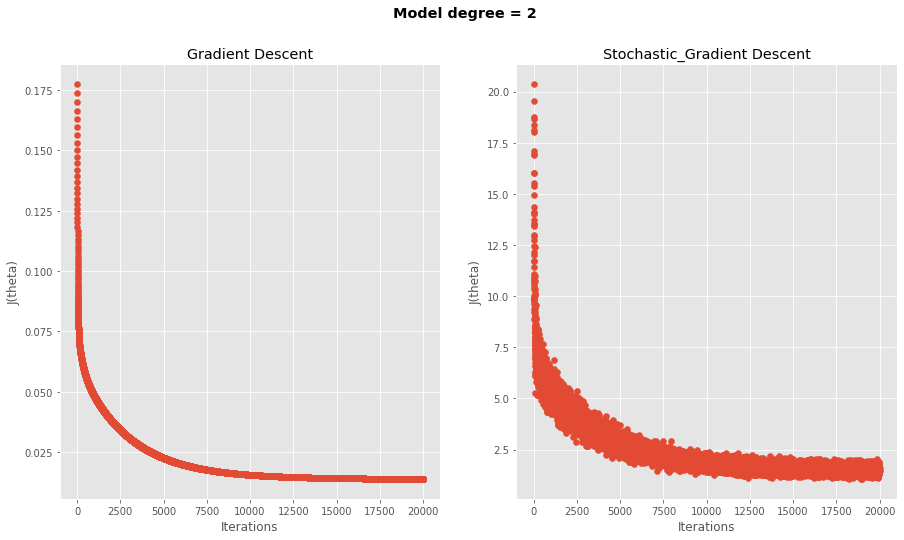

In [90]:
cost_plotter(n_iter, cost_history_gd, cost_history_sgd, degree)

In [91]:
l = np.c_[X11, X21]
train_X_terms, A = generate_vectors(l, degree)
print(calculate_cost(W_gd, train_X_terms, Y1))

train_X_terms, A = generate_vectors(l, degree)
print(calculate_cost(W_sgd, train_X_terms, Y1))

0.01317645966877714
0.013306912130482997


In [92]:
#model degree = 3
l = np.c_[X1, X2]
train_X_terms, W_gd, cost_history_gd, W_sgd, cost_history_sgd, n_iter, degree = model(l, Y, 0.01, 20000, 3)

[ 0.83774882 -1.24344656 -0.87031031 -0.45448217  0.81793002 -0.06813203
 -0.15438071  0.44014899  0.02368976  0.2235409 ]
Final cost/MSE:  0.015
-------------------------------------------------------------------
0.1772109046984585
0.0529601625606191
0.04369756034492559
0.03758849310548008
0.032990766853229936
0.029483701469638426
0.026798405436998813
0.024734621834984122
0.023141201107951734
0.02190393306096488
0.020936507766617082
0.020173695310602684
0.019566193298478793
0.019076733913552305
0.018677142592425634
0.01834611569015666
0.018067541376087095
0.01782923096678258
0.01762196036461931
0.01743874579705017
0.01727429658241393
0.017124601649000728
0.016986617112344452
0.01685803020805556
0.016737080916082094
0.016622427174703865
0.016513043029681807
0.016408141668443538
0.016307117256979756
0.016209500983890245
0.016114927839344033
0.01602311150544821
0.015933825375781658
0.01584688820635776
0.015762153266355095
0.015679500133545386
0.015598828488331176
0.01552005341820508
0.01

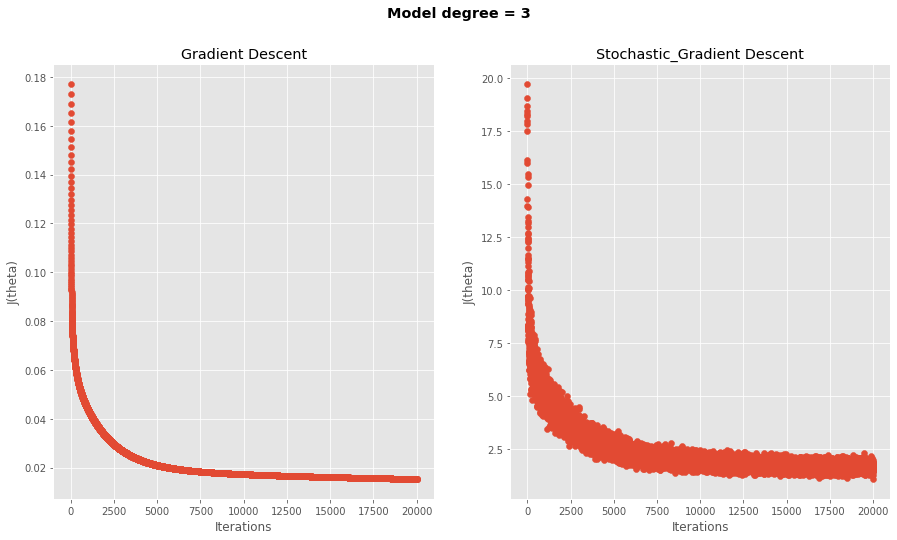

In [93]:
cost_plotter(n_iter, cost_history_gd, cost_history_sgd, degree)

In [94]:
l = np.c_[X11, X21]
train_X_terms, A = generate_vectors(l, degree)
print(calculate_cost(W_gd, train_X_terms, Y1))

train_X_terms, A = generate_vectors(l, degree)
print(calculate_cost(W_sgd, train_X_terms, Y1))

0.014506053882511099
0.015359064880390749


In [95]:
#model degree = 4
l = np.c_[X1, X2]
train_X_terms, W_gd, cost_history_gd, W_sgd, cost_history_sgd, n_iter, degree = model(l, Y, 0.01, 20000, 4)

[ 0.84039392 -1.26419354 -0.83809012 -0.38305718 -0.08662567  0.81434386
 -0.04795921 -0.09942264  0.00227096  0.40154234  0.03464771  0.02089807
  0.15963698  0.02011318  0.01231193]
Final cost/MSE:  0.015
-------------------------------------------------------------------
0.17694148476139507
0.05039933935592188
0.041012547495193855
0.03508769573823466
0.03099975830031969
0.028134721820100232
0.02609333408140284
0.024608316702928356
0.023500467948915017
0.02264956798505509
0.02197490589634799
0.021422240728240054
0.020955069840595128
0.02054878109408432
0.02018673593700517
0.019857645437235786
0.019553812151583545
0.01926995187149009
0.01900240377427541
0.018748600767690957
0.018506714167329262
0.018275415202561183
0.018053714833368515
0.01784085607449847
0.017636241537829302
0.017439384606468843
0.017249876473963536
0.017067363841062347
0.01689153377719093
0.016722103402972387
0.01655881282048474
0.01640142023449831
0.01624969855442226
0.01610343299919206
0.01596241938341915
0.015826

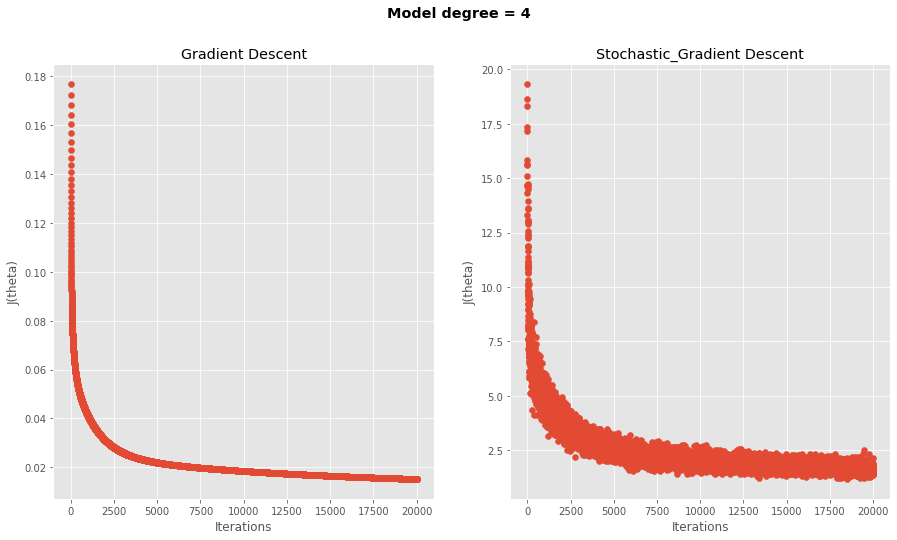

In [96]:
cost_plotter(n_iter, cost_history_gd, cost_history_sgd, degree)

In [97]:
l = np.c_[X11, X21]
train_X_terms, A = generate_vectors(l, degree)
print(calculate_cost(W_gd, train_X_terms, Y1))

train_X_terms, A = generate_vectors(l, degree)
print(calculate_cost(W_sgd, train_X_terms, Y1))

0.014442356422911362
0.015897209744232157


In [98]:
#model degree = 5
l = np.c_[X1, X2]
train_X_terms, W_gd, cost_history_gd, W_sgd, cost_history_sgd, n_iter, degree = model(l, Y, 0.01, 20000, 5)

[ 0.8475393  -1.29140982 -0.86867726 -0.40921916 -0.10703888  0.07752399
  0.84054173 -0.05480295 -0.11516933 -0.01386232  0.09443756  0.4211846
  0.03006852  0.00898891  0.07479914  0.1708288   0.01415223  0.03719205
  0.01613438 -0.01572    -0.08444757]
Final cost/MSE:  0.015
-------------------------------------------------------------------
0.1767355207784117
0.048685599996384256
0.039542272943608896
0.034119483155042526
0.030646063572157364
0.028327974573920712
0.02670225296577597
0.0254968371765603
0.024551415197480535
0.02377117084909702
0.023099721014911673
0.022503270469138238
0.02196132690942592
0.02146125462554588
0.020995075812019273
0.020557589011652937
0.020145260156995838
0.019755567332991383
0.01938661237445763
0.01903688966084444
0.018705147713261382
0.018390305718443516
0.018091402664943503
0.01780756591814188
0.01753799143855659
0.017281931017174398
0.017038683772968147
0.016807590265493125
0.016588028232981288
0.016379409357935908
0.01618117669633485
0.0159928025471

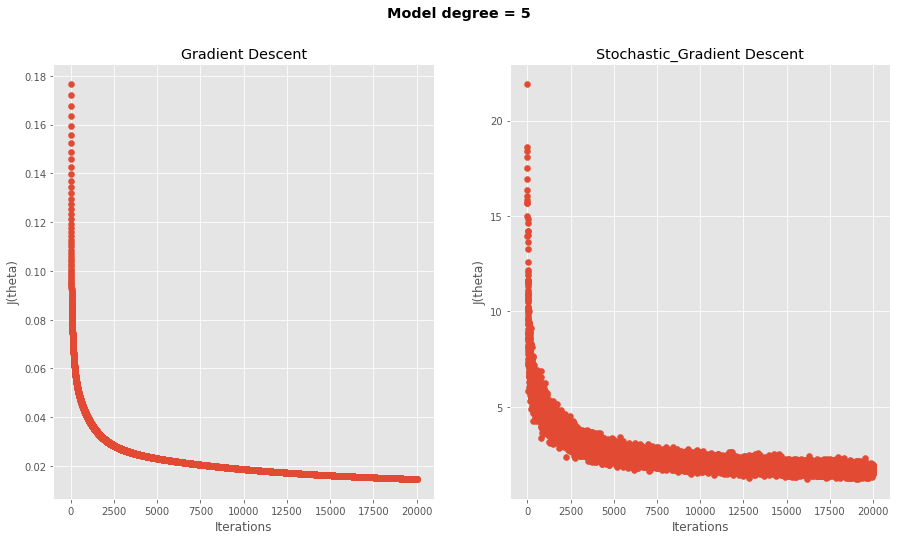

In [99]:
cost_plotter(n_iter, cost_history_gd, cost_history_sgd, degree)

In [100]:
l = np.c_[X11, X21]
train_X_terms, A = generate_vectors(l, degree)
print(calculate_cost(W_gd, train_X_terms, Y1))

train_X_terms, A = generate_vectors(l, degree)
print(calculate_cost(W_sgd, train_X_terms, Y1))

0.013920906813439313
0.015442865439453128


In [101]:
#model degree = 6
l = np.c_[X1, X2]
train_X_terms, W_gd, cost_history_gd, W_sgd, cost_history_sgd, n_iter, degree = model(l, Y, 0.01, 20000, 6)

[ 0.85082833 -1.29995841 -0.8952694  -0.44726877 -0.15092286  0.03143787
  0.14240854  0.8598558  -0.06210912 -0.14069425 -0.04999535  0.05290477
  0.13471291  0.44866351  0.02637456 -0.01375737  0.0412565   0.10827451
  0.20204184  0.01293858  0.01671284  0.07001916  0.04899081 -0.01531628
  0.02036333 -0.05100024 -0.0419063  -0.11922835]
Final cost/MSE:  0.014
-------------------------------------------------------------------
0.176570363842077
0.047602247386531946
0.038875331339901543
0.03400328795714425
0.0310030142794363
0.02898898583627366
0.027510353785616126
0.026335546678259034
0.0253443048457493
0.024473113439556108
0.023687548426728103
0.02296821551922996
0.022303571156668478
0.021686238167401742
0.021111102413365095
0.020574321051704075
0.020072799901574092
0.019603913767211427
0.01916535358401609
0.018755040407565676
0.018371075056865402
0.018011707064795653
0.017675314287783395
0.017360388549909785
0.017065524816724242
0.016789412521909193
0.016530828276407148
0.016288629

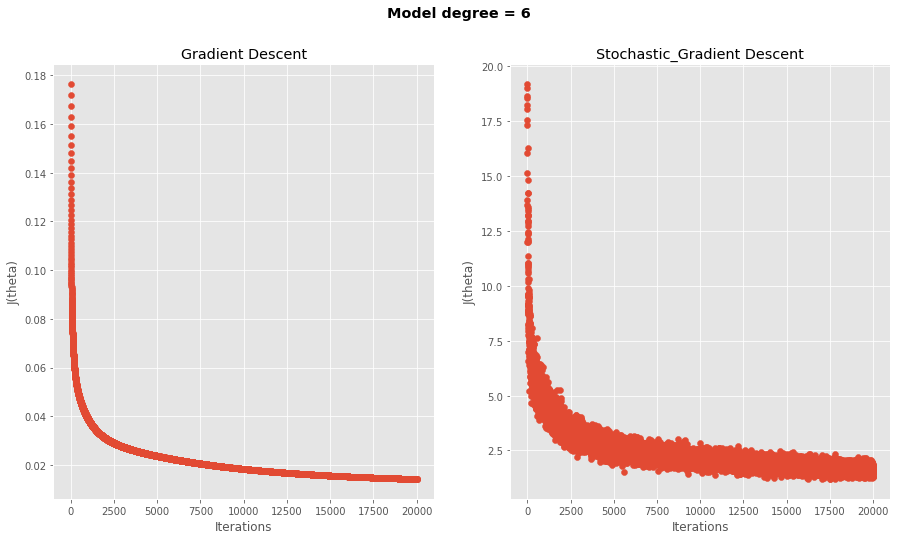

In [102]:
cost_plotter(n_iter, cost_history_gd, cost_history_sgd, degree)

In [103]:
l = np.c_[X11, X21]
train_X_terms, A = generate_vectors(l, degree)
print(calculate_cost(W_gd, train_X_terms, Y1))

train_X_terms, A = generate_vectors(l, degree)
print(calculate_cost(W_sgd, train_X_terms, Y1))

0.01349491236999898
0.014795412452988956


In [104]:
#model degree = 7
l = np.c_[X1, X2]
train_X_terms, W_gd, cost_history_gd, W_sgd, cost_history_sgd, n_iter, degree = model(l, Y, 0.01, 20000, 7)

[ 8.50465918e-01 -1.29438820e+00 -9.06334448e-01 -4.74032030e-01
 -1.88860455e-01 -1.35600401e-02  9.34094766e-02  1.58754566e-01
  8.66255333e-01 -6.49574721e-02 -1.58991702e-01 -8.11837297e-02
  1.27175948e-02  8.88806610e-02  1.44024946e-01  4.67150807e-01
  2.55159749e-02 -3.21351388e-02  9.95576397e-03  6.83431960e-02
  1.19580211e-01  2.29520558e-01  1.51789433e-02 -2.67362643e-04
  3.97163573e-02  8.79928117e-02  8.29823638e-02 -1.01757293e-02
  5.06063667e-03  4.91454169e-02 -1.22633403e-02 -3.43115031e-02
  2.16835099e-03 -7.69921137e-02 -5.43739820e-02 -1.22609242e-01]
Final cost/MSE:  0.014
-------------------------------------------------------------------
0.17643300838235038
0.04696243430960467
0.038698365251110714
0.03427613649708087
0.031543116620382824
0.02961736406330128
0.02810765596372557
0.026836436630595824
0.02572020098641439
0.024717414089267364
0.023805635312409
0.022971358976352052
0.022205439076033163
0.02150099144823786
0.020852408758660686
0.0202548827903425

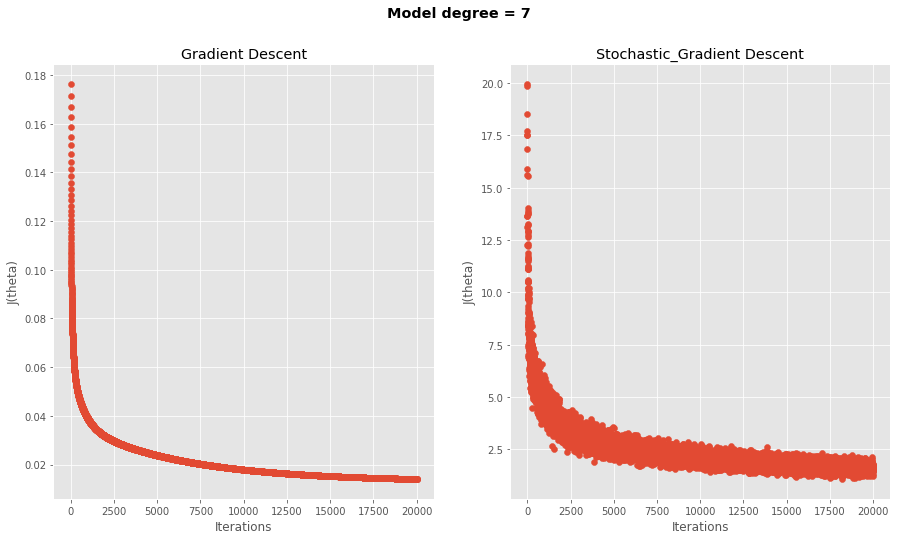

In [105]:
cost_plotter(n_iter, cost_history_gd, cost_history_sgd, degree)

In [106]:
l = np.c_[X11, X21]
train_X_terms, A = generate_vectors(l, degree)
print(calculate_cost(W_gd, train_X_terms, Y1))

train_X_terms, A = generate_vectors(l, degree)
print(calculate_cost(W_sgd, train_X_terms, Y1))

0.013289205023734773
0.014155635351834055


In [107]:
#model degree = 8
l = np.c_[X1, X2]
train_X_terms, W_gd, cost_history_gd, W_sgd, cost_history_sgd, n_iter, degree = model(l, Y, 0.01, 20000, 8)

[ 0.84810059 -1.28226298 -0.90496207 -0.48702575 -0.21410532 -0.04791195
  0.05278045  0.11407278  0.15132531  0.86293955 -0.06390822 -0.16774718
 -0.10153379 -0.0174092   0.05148143  0.10162098  0.13621345  0.47451717
  0.02674856 -0.04307999 -0.01256528  0.03664726  0.08123831  0.11602731
  0.24662302  0.01888629 -0.01100269  0.01688722  0.05604334  0.09167993
  0.10808771 -0.00356936 -0.00462702  0.02676659  0.06295035  0.01927279
 -0.0249473  -0.00622001  0.02927603 -0.04030113 -0.04255522 -0.01016521
 -0.08176829 -0.05652708 -0.11153592]
Final cost/MSE:  0.014
-------------------------------------------------------------------
0.17631546177593663
0.04662585791289203
0.03878822520084621
0.034663381474857737
0.03202061355052384
0.03004657871413591
0.028422845285206666
0.027017466025385385
0.02577060051585538
0.024651310256308855
0.023640866906981882
0.02272611980220763
0.021896764577544088
0.02114416387462483
0.020460803957692095
0.019840020873865646
0.019275845614063425
0.018762904

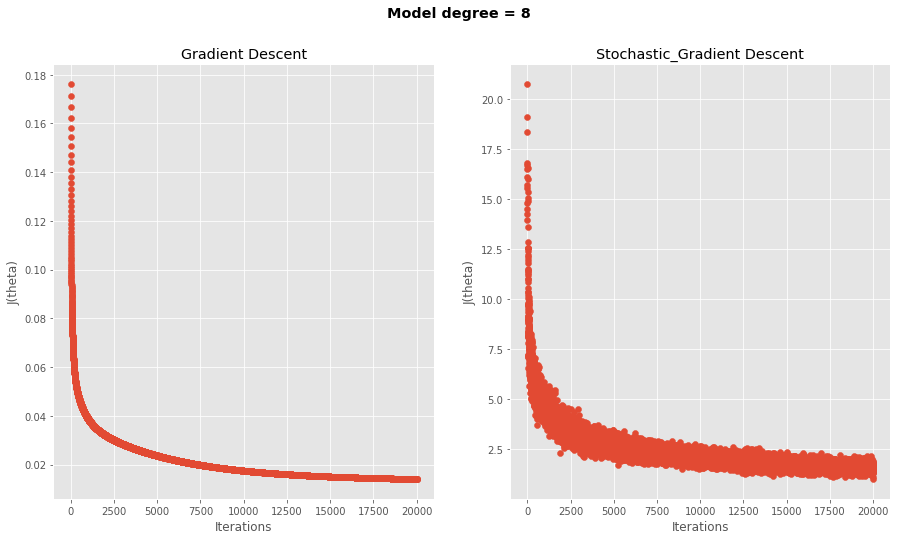

In [108]:
cost_plotter(n_iter, cost_history_gd, cost_history_sgd, degree)

In [109]:
l = np.c_[X11, X21]
train_X_terms, A = generate_vectors(l, degree)
print(calculate_cost(W_gd, train_X_terms, Y1))

train_X_terms, A = generate_vectors(l, degree)
print(calculate_cost(W_sgd, train_X_terms, Y1))

0.013264105254155775
0.013881550224416622


In [110]:
#model degree = 9
l = np.c_[X1, X2]
train_X_terms, W_gd, cost_history_gd, W_sgd, cost_history_sgd, n_iter, degree = model(l, Y, 0.01, 20000, 9)

[ 0.845129   -1.26895191 -0.89659808 -0.48962951 -0.22770167 -0.07065982
  0.02302467  0.07922406  0.11293632  0.13286974  0.85441378 -0.06059358
 -0.16907039 -0.11186434 -0.03668189  0.02474735  0.06915684  0.09958527
  0.11969045  0.47342321  0.02905366 -0.04755312 -0.02605319  0.01482409
  0.05263885  0.08229125  0.10389981  0.25380861  0.02278459 -0.01611425
  0.00223327  0.03313887  0.06226421  0.08578161  0.12279559  0.00271452
 -0.00931174  0.01189442  0.03970878  0.06513289  0.04045116 -0.01615508
 -0.01003564  0.01464664  0.04159475 -0.01365735 -0.03138728 -0.01295671
  0.01468094 -0.05053162 -0.04320477 -0.01627868 -0.0764379  -0.05230252
 -0.09511684]
Final cost/MSE:  0.014
-------------------------------------------------------------------
0.17621254492765048
0.04649046110545007
0.038997365290210494
0.035023857181193024
0.03235197140548912
0.030264388378801608
0.0285060007025156
0.026974670658859553
0.025621742746735496
0.024418780320001363
0.023345915444931593
0.0223875296

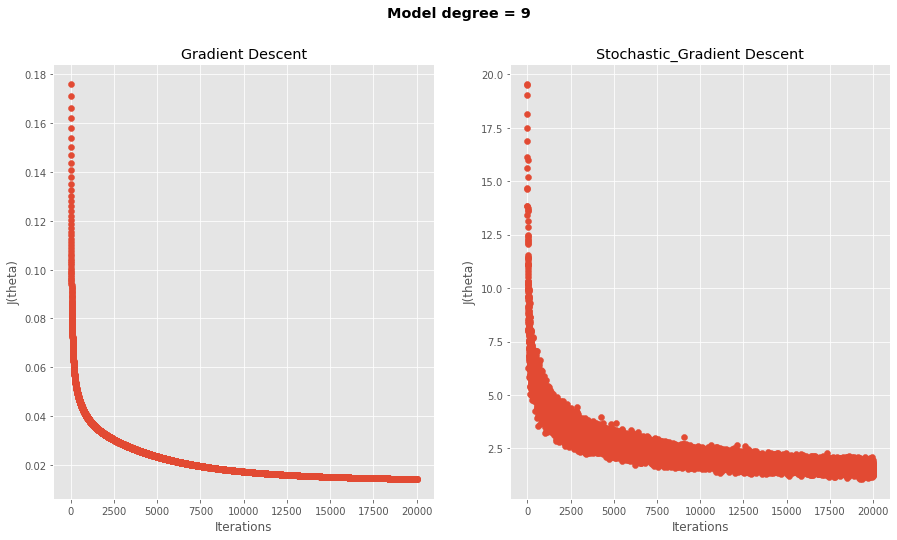

In [111]:
cost_plotter(n_iter, cost_history_gd, cost_history_sgd, degree)

In [112]:
l = np.c_[X11, X21]
train_X_terms, A = generate_vectors(l, degree)
print(calculate_cost(W_gd, train_X_terms, Y1))

train_X_terms, A = generate_vectors(l, degree)
print(calculate_cost(W_sgd, train_X_terms, Y1))

0.013345823951747054
0.01366009826482999
